In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [3]:
data = pd.read_csv('iris-dataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


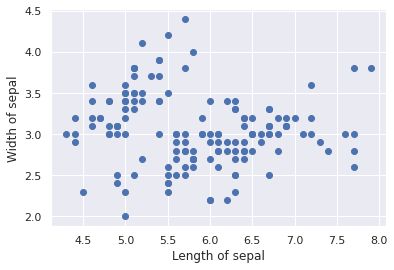

In [4]:
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal')
plt.show()

# Unscaled

In [5]:
x = data.copy()
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [6]:
clusters = data.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

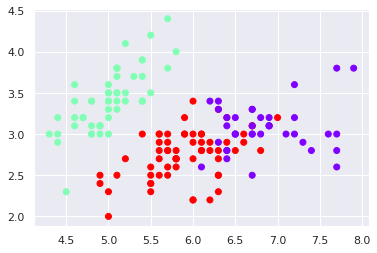

In [8]:
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters ['cluster_pred'], cmap = 'rainbow')
# A scatter plot with unscaled values

# Scaled

In [9]:
xscaled = data.copy()
x_scaled = preprocessing.scale(xscaled)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [10]:
# The Elbow Method
wcss = []
cl_num = 10
# 'cl_num' is an arbitrary number.
for i in range(1,cl_num):
# Range is 1 to 9
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0,
 223.73200573676348,
 140.96581663074699,
 114.57790500611006,
 91.07297664109795,
 81.74174286373768,
 72.51062349090563,
 63.234174221357335,
 54.396775429740295]

Text(0, 0.5, 'Within-cluster Sum of Squares')

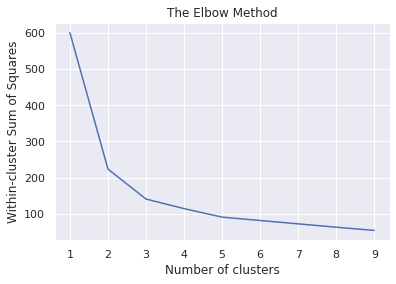

In [11]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [12]:
kmeans_scaled = KMeans(3)
kmeans_scaled.fit(x_scaled)
clusters_scaled = data.copy()
clusters_scaled['cluster_pred'] = kmeans_scaled.fit_predict(x_scaled)
# After several tries, I settled with 3 Clusters, just like what I did with the clustered unscaled data of the sepal size.

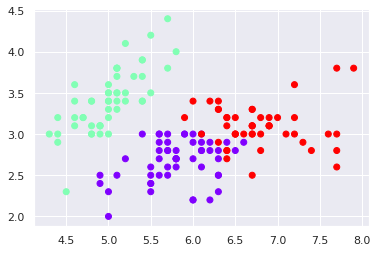

In [13]:
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c=clusters_scaled ['cluster_pred'], cmap = 'rainbow')

# Checking my Solution

In [14]:
real_data = pd.read_csv('iris-with-answers.csv')
real_data
# Here I loaded the dataset containing the species of the Iris flower to check whether I did a correct Clustering of the Iris Dataset. 
# I learned that Clustering cannot be trusted at all times even with the Elbow Method. The method doesn't show the optimal number of clusters to use - only the different distance between different clusters and within clusters.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
real_data['species'].unique()
# To check the data in the feature species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [17]:
data_mapped = real_data.copy()
data_mapped['species']=data_mapped['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
data_mapped
# Here I simply mapped the categorical data into numerical variables to plot them on a graph. 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
x = data_mapped.iloc[:,4:]
x
# I used the .iloc indexer to select my desired position in the dataframe.

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [23]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [24]:
identified_clusters = kmeans.fit_predict(x)

In [25]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


## Sepal Size

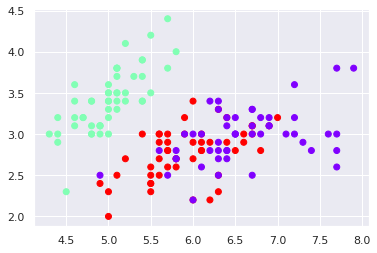

In [26]:
plt.scatter(data_with_clusters['sepal_length'], data_with_clusters['sepal_width'], c= data_with_clusters ['Cluster'], cmap = 'rainbow')

## Petal Size 

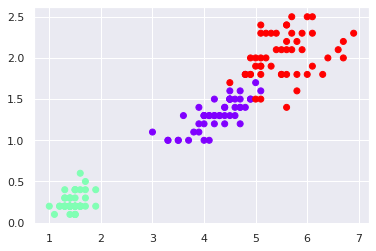

In [50]:
plt.scatter(data_with_clusters['petal_length'], data_with_clusters['petal_width'], c= data_with_clusters ['Cluster'], cmap = 'rainbow')